# **Predictive Analysis of Heart Disease Using Machine Learning**

Heart disease remains one of the leading causes of mortality worldwide, necessitating early detection and prevention strategies. This project aims to leverage the Heart Attack Analysis & Prediction Dataset to develop a predictive model for heart disease. By analyzing demographic and clinical parameters, such as age, sex, chest pain type, and serum cholesterol, among others, we seek to identify significant predictors of heart disease. This analysis is crucial for understanding risk factors and improving patient outcomes through early intervention.


In [ ]:
# Import necessary libraries

# Suppress warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis libraries
import pandas as pd  # For handling dataframes
import numpy as np   # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # For static plotting
import seaborn as sns            # For statistical plots
import plotly.express as px      # For interactive plots

# Set default aesthetics for seaborn plots
sns.set_theme(style="whitegrid")  # This sets the theme for seaborn plots.

In [ ]:
# Import the drive module from google.colab
from google.colab import drive

# Mount Google Drive at the specified mount point (/content/drive).
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the base directory where the dataset is located
data_dir = "/content/drive/MyDrive/Classwork/Data 606/data/"

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_dir + "heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 303 rows and 14 columns.


In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


There are no missing values

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


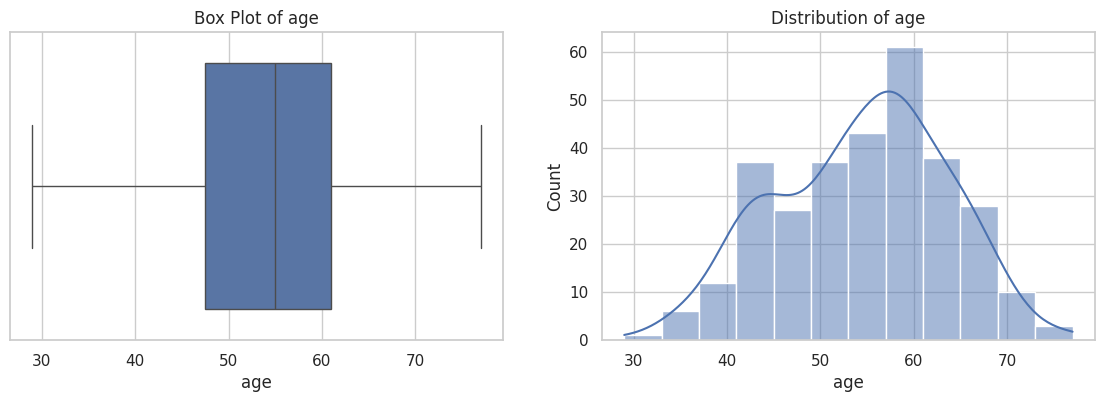

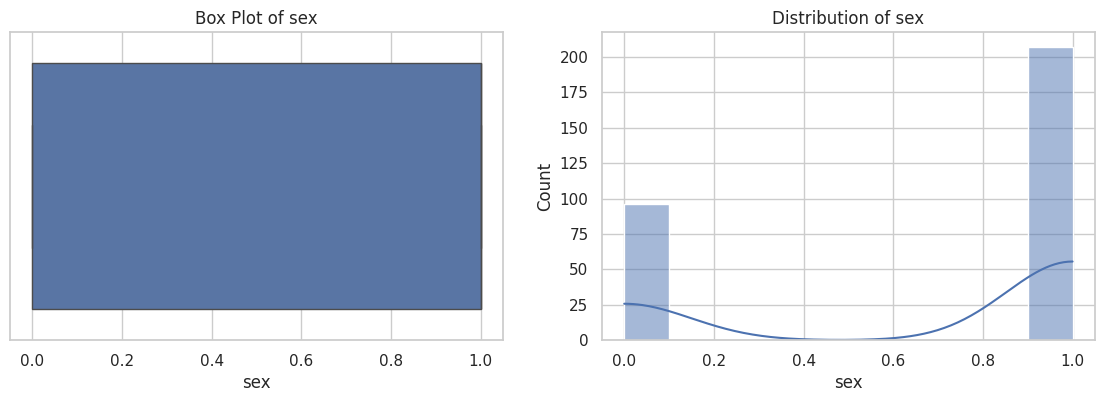

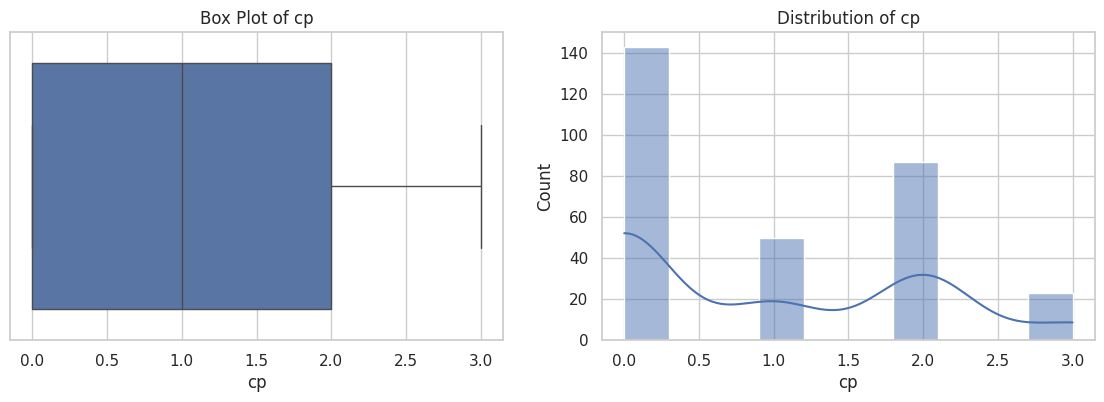

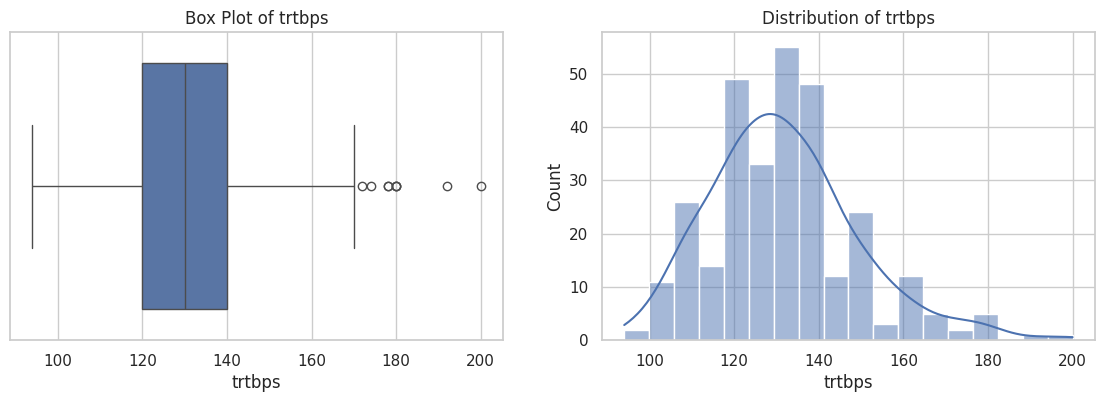

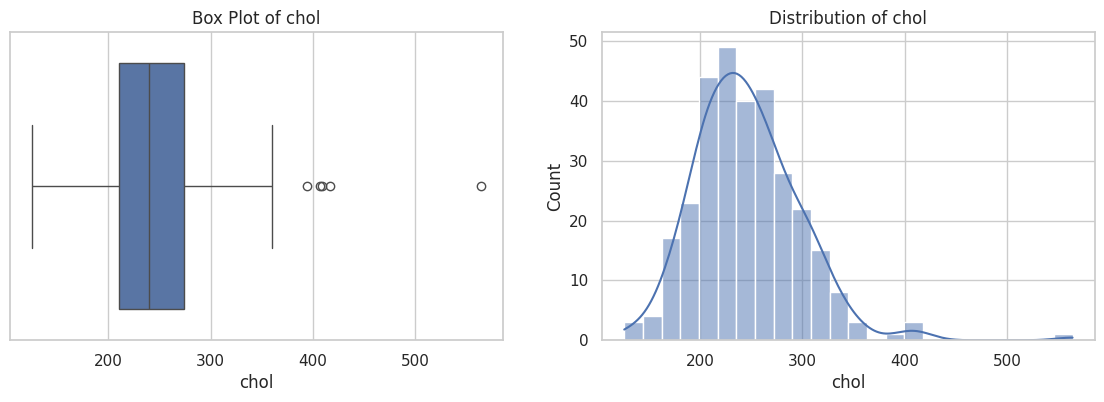

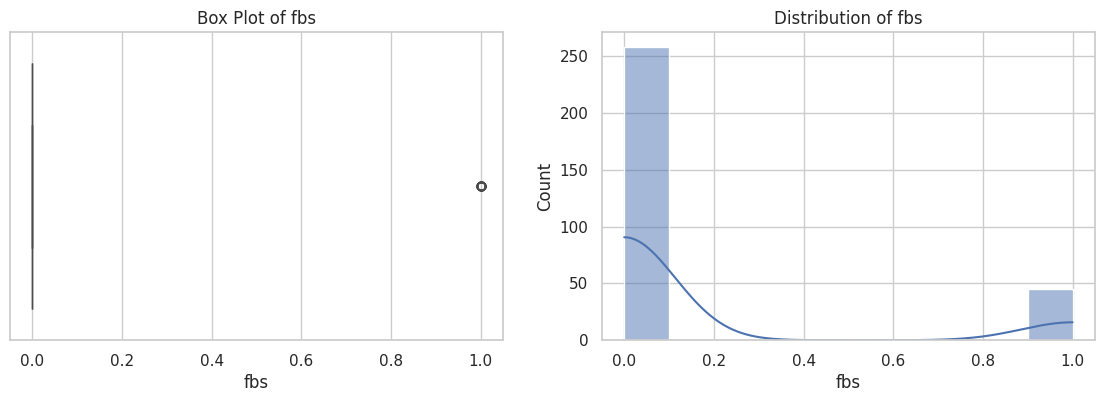

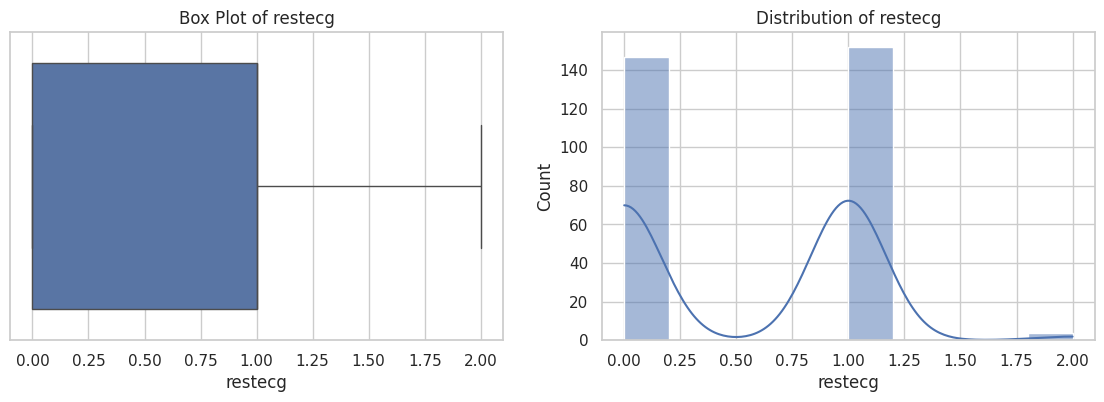

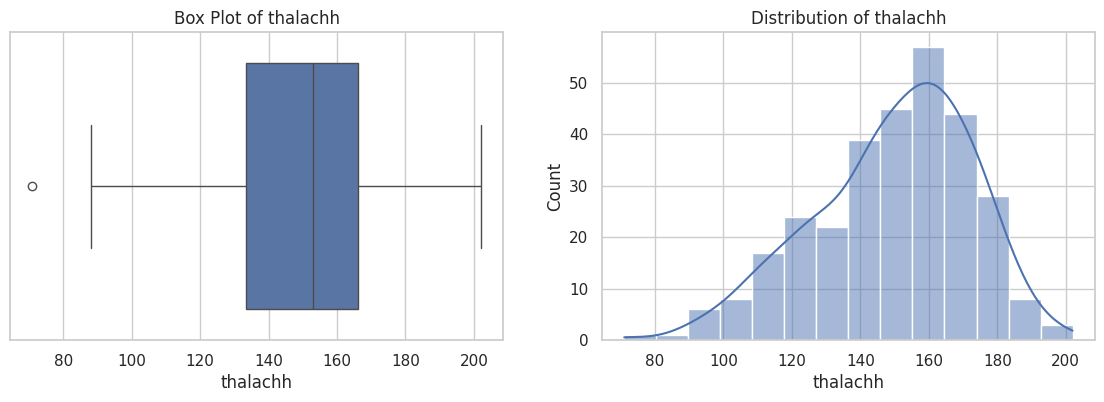

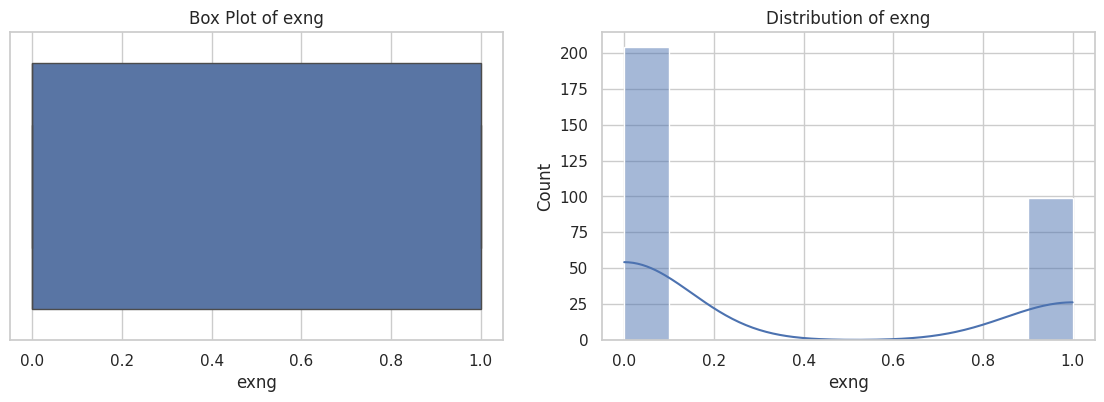

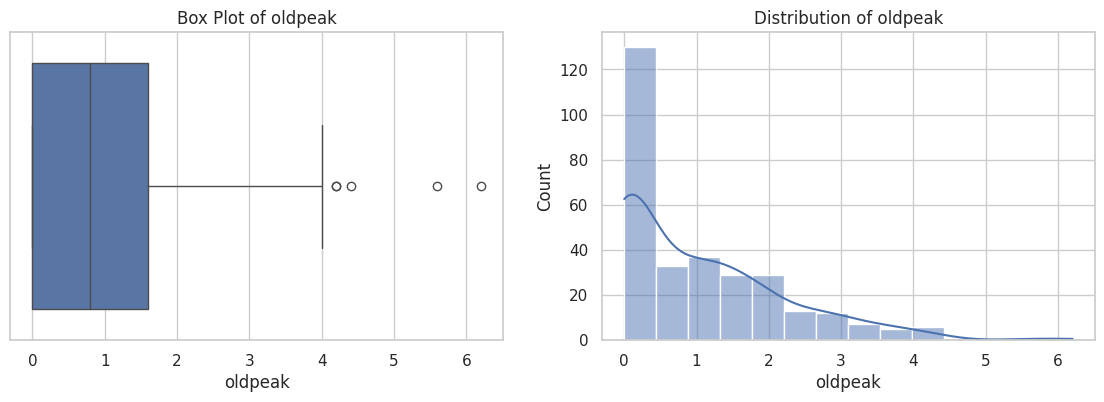

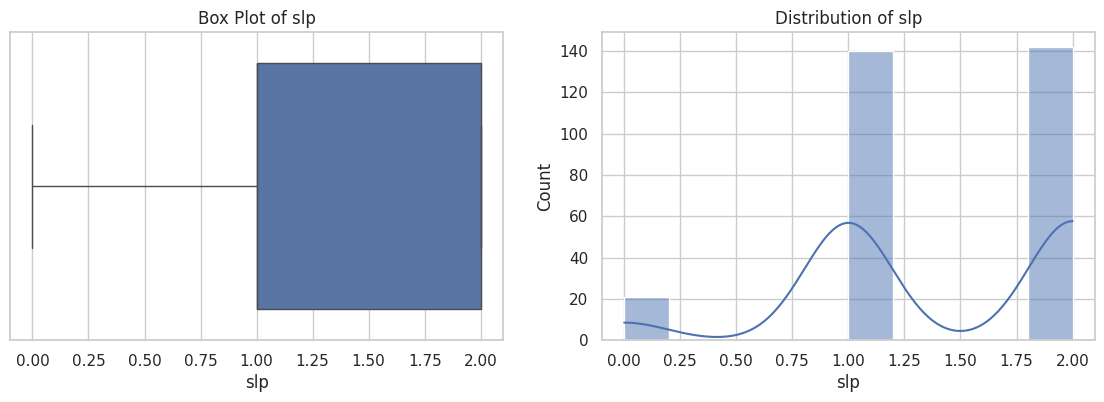

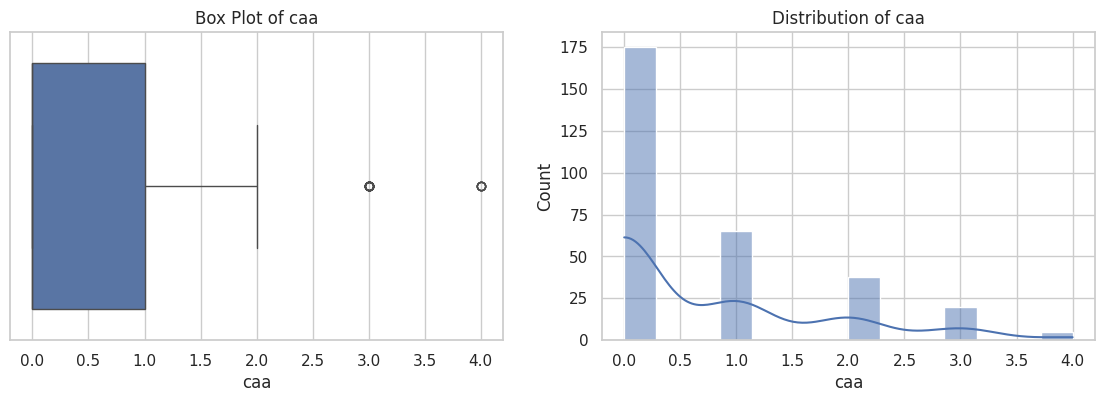

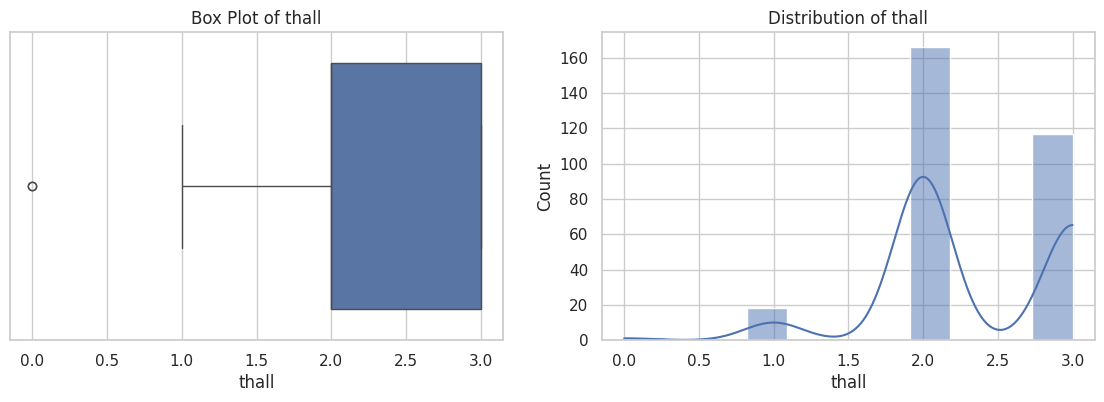

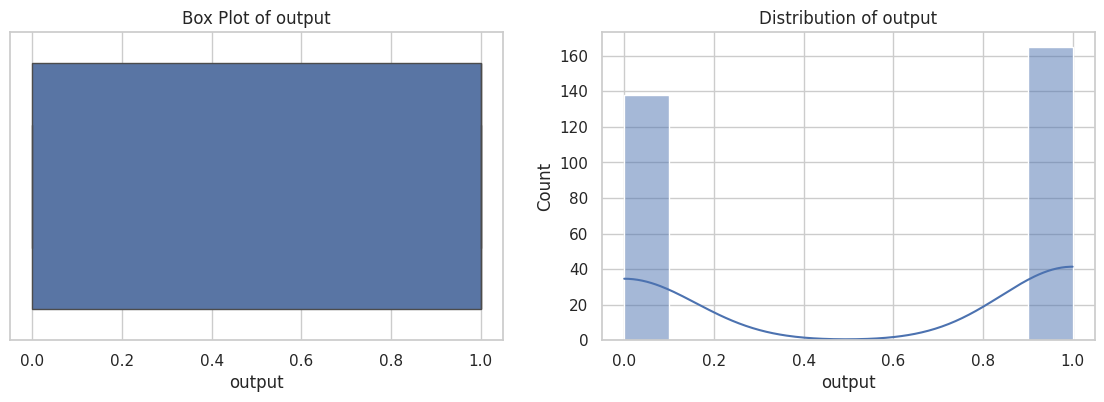

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Visualization of statistical summaries for numerical features
for column in df.select_dtypes(include=[np.number]).columns:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    # Box plot
    sns.boxplot(x=df[column], ax=ax[0])
    ax[0].set_title(f'Box Plot of {column}')

    # Histogram
    sns.histplot(df[column], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {column}')

    plt.show()


In [ ]:
## Note: This is useful for initial data exploration, especially to identify columns with a high number of unique values or low diversity (potential categorical variables).
distinct_values_count = {}

# Loop through each column in the DataFrame to count distinct values
for column in df.columns:
    # Calculate the number of unique values in the column
    num_distinct_values = len(df[column].unique())

    # Store the count in the dictionary with the column name as the key
    distinct_values_count[column] = num_distinct_values

    # Print the column name and its number of distinct values
    print(f"{column}: {num_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


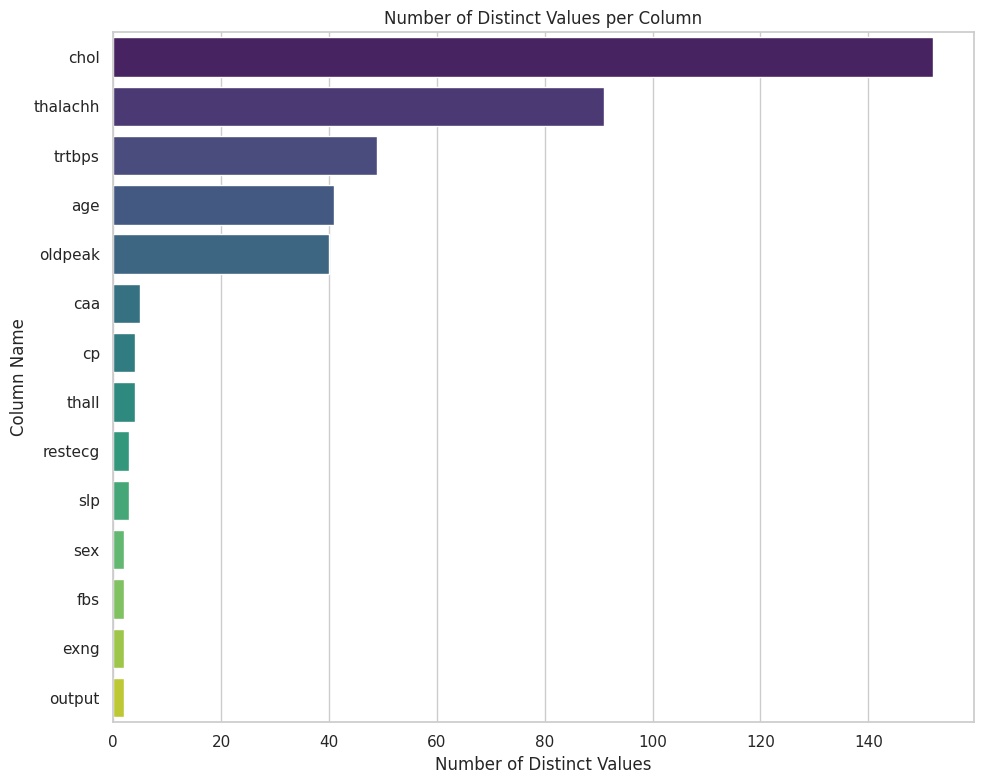

In [ ]:
# Visualization of the distinct value counts for each column
# Convert the dictionary to a DataFrame for easier plotting
distinct_values_df = pd.DataFrame(list(distinct_values_count.items()), columns=['Column', 'Distinct Values'])

# Sort the DataFrame by the number of distinct values to make the plot more informative
distinct_values_df = distinct_values_df.sort_values(by='Distinct Values', ascending=False)

# Create a bar plot showing the number of distinct values in each column
plt.figure(figsize=(10, 8))
sns.barplot(x='Distinct Values', y='Column', data=distinct_values_df, palette='viridis')
plt.title('Number of Distinct Values per Column')
plt.xlabel('Number of Distinct Values')
plt.ylabel('Column Name')
plt.tight_layout()  # Adjust the layout to make room for the labels

# Show the plot
plt.show()